# SUICIDE


import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
suicide =pd.read_csv("suicide.csv")

In [3]:
suicide.shape

(27820, 12)

In [4]:
suicide.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
suicide.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


# renaming and preprocessing the column names

In [6]:
suicide.rename(columns = {suicide.columns.values[9]: 'gdp', suicide.columns.values[10]: 'gdp_per_capita'}, inplace = True)

In [7]:
suicide['gdp'].replace(',', '', regex = True, inplace = True)


In [8]:
suicide['gdp'] = pd.to_numeric(suicide['gdp'])

In [9]:
suicide['suicides_no'] = suicide['suicides_no'].astype(float)
suicide['suicides/100k pop'] = suicide['suicides/100k pop'].astype(float)

In [10]:
suicide['gdp'] = suicide['gdp_per_capita'].astype(float)

# data analysis

In [11]:
suicide.nlargest(15, ['suicides/100k pop'])

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp,gdp_per_capita,generation
1258,Aruba,1995,male,75+ years,2.0,889,224.97,Aruba1995,NaN,17949.0,17949,G.I. Generation
22280,Seychelles,2006,male,75+ years,2.0,976,204.92,Seychelles2006,NaN,12442.0,12442,Silent
24332,Suriname,2012,male,75+ years,10.0,5346,187.06,Suriname2012,0.711,10227.0,10227,Silent
20542,Republic of Korea,2011,male,75+ years,1276.0,688365,185.37,Republic of Korea2011,NaN,25157.0,25157,Silent
20530,Republic of Korea,2010,male,75+ years,1152.0,631853,182.32,Republic of Korea2010,NaN,22994.0,22994,Silent
11376,Hungary,1992,male,75+ years,317.0,178482,177.61,Hungary1992,NaN,3970.0,3970,G.I. Generation
11388,Hungary,1993,male,75+ years,300.0,168944,177.57,Hungary1993,NaN,4116.0,4116,G.I. Generation
11364,Hungary,1991,male,75+ years,333.0,188235,176.91,Hungary1991,NaN,3561.0,3561,G.I. Generation
20470,Republic of Korea,2005,male,75+ years,780.0,442349,176.33,Republic of Korea2005,NaN,19460.0,19460,Silent
11400,Hungary,1994,male,75+ years,292.0,165660,176.26,Hungary1994,NaN,4431.0,4431,G.I. Generation


Retrieve the top 20 countries with the highest suicides 

In [12]:
country_suicides = suicide.groupby('country')['suicides_no'].sum()
sorted_countries = country_suicides.sort_values(ascending=False)
top_20_countries = sorted_countries.head(20)


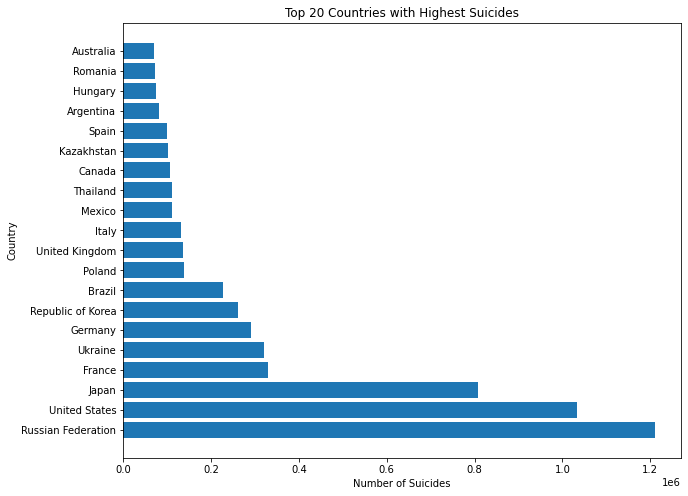

In [13]:
plt.figure(figsize=(10, 8))
plt.barh(top_20_countries.index, top_20_countries.values)
plt.title('Top 20 Countries with Highest Suicides')
plt.xlabel('Number of Suicides')
plt.ylabel('Country')
plt.show()

Russian Federation has the highest suicides , united states and japan also have high number of suicides.

now, are these countries having the same trend through out the years ? 

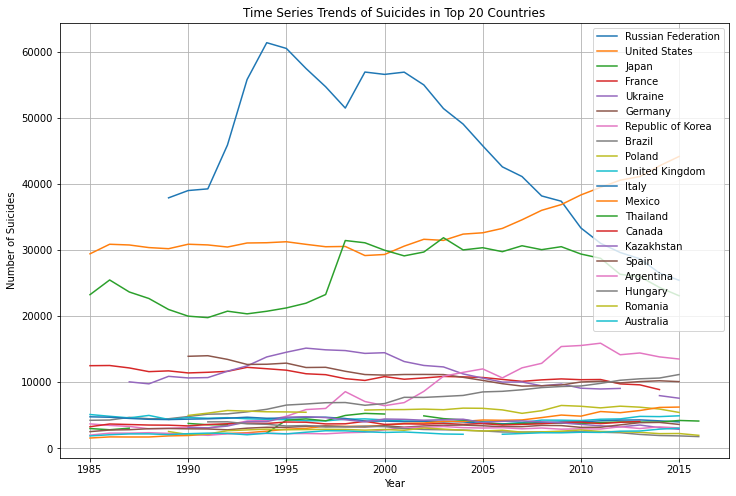

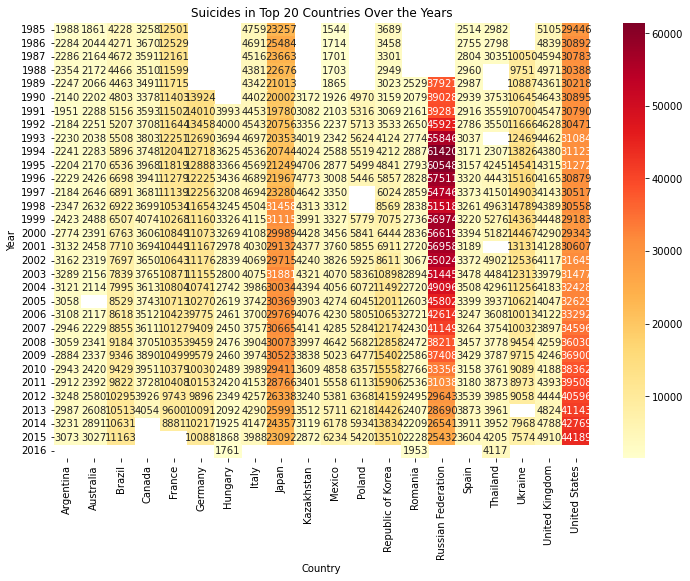

In [14]:
# Group the data by country and year, and calculate the total suicides
country_year_suicides = suicide.groupby(['country', 'year'])['suicides_no'].sum().reset_index()
top_20_countries = country_year_suicides.groupby('country')['suicides_no'].sum().nlargest(20).index
top_20_data = country_year_suicides[country_year_suicides['country'].isin(top_20_countries)]


time_series_data = top_20_data.pivot('year', 'country', 'suicides_no')

# Plot the time series trends
plt.figure(figsize=(12, 8))
for country in top_20_countries:
    plt.plot(time_series_data[country], label=country)

plt.title('Time Series Trends of Suicides in Top 20 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')

plt.legend(loc='upper right')

plt.grid(True)

plt.show()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(time_series_data, cmap='YlOrRd', annot=True, fmt='g', cbar=True)

plt.title('Suicides in Top 20 Countries Over the Years')
plt.xlabel('Country')
plt.ylabel('Year')
plt.xticks(rotation=90)

# Show the plot
plt.show()


The suicide rate in japan , united states and Russian Federation is obviously high compared to all countries, but we can see  declination in Russian Federation, Ukraine  .But in united states the suicide rate has increased from 2010.

Japan has little fluctuations throughout the years but has always had the high number of suicide rates although there is slow decline after 2010

Also, there are countries like South korea where the suicide rates have been increasing after 2001.similarly suicide rate in Brazil also increased slightly from 2000

***number of suicides committed by male and female over the years***

Group the data by year and sex, and calculate the mean suicide rate

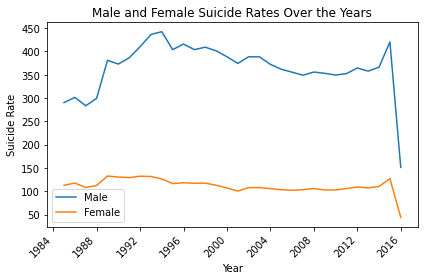

In [15]:

suicide['year'] = pd.to_datetime(suicide['year'], format='%Y')
grouped_data = suicide.groupby(['year', 'sex'])['suicides_no'].mean().reset_index()
# Pivot the data to have separate columns for male and female suicide rates
pivoted_data = grouped_data.pivot(index='year', columns='sex', values='suicides_no')

# Plot the male and female suicide rates
plt.plot(pivoted_data.index, pivoted_data['male'], label='Male')
plt.plot(pivoted_data.index, pivoted_data['female'], label='Female')

plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.title('Male and Female Suicide Rates Over the Years')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


There is a large gap in the number of suicides comitted by male and female over the years.The suicide rate in male has Increased from 1998 and we can see some fluctuatioins in the graph even though male suicide rate is significantly high  than female through out  the years.

around 2016 male suicides has decresed drastically which was almost as less as female suicide rates.

**!suicide rates between different age groups in  each gender!**

age     15-24 years  25-34 years  35-54 years  5-14 years  55-74 years  \
sex                                                                      
female    75.586816    89.971133   218.109866    7.373970   185.280483   
male     272.772512   394.264972   838.392072   15.300217   529.257648   

age      75+ years  
sex                 
female   95.641534  
male    185.753555  


<Figure size 720x432 with 0 Axes>

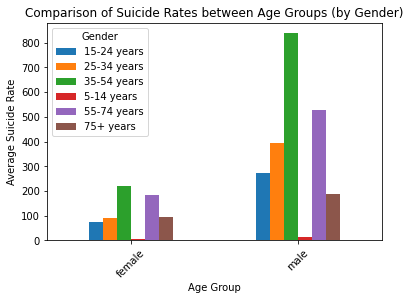

In [16]:

grouped = suicide.groupby(['sex', 'age'])['suicides_no'].mean().unstack()

# Print the average suicide rates by gender and age group
print(grouped)

# Plot the comparison of suicide rates between age groups for each gender
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average Suicide Rate')
plt.title('Comparison of Suicide Rates between Age Groups (by Gender)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()


from the plot it is observed that people of  age group from 35-54 years  had comitted highest suicides in both genders. Gladly suicides in 5 -14 years aged group are less in male and female average.

male population aged 55-74 years have second highest rate in suicides 

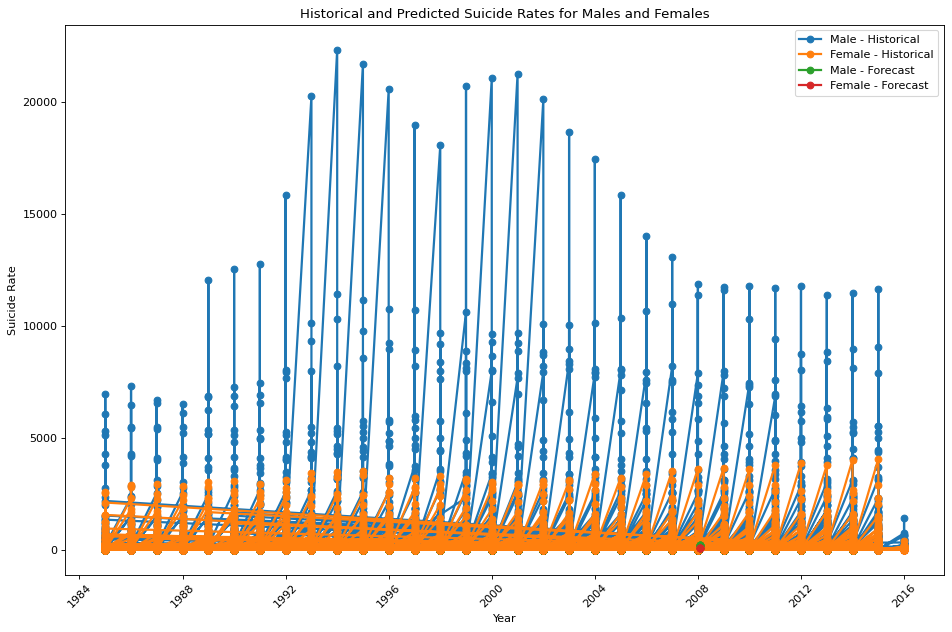

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('suicide.csv')

male_data = df[df['sex'] == 'male'][['year', 'suicides_no']].copy()
female_data = df[df['sex'] == 'female'][['year', 'suicides_no']].copy()

male_data['year'] = pd.to_datetime(male_data['year'], format='%Y')
female_data['year'] = pd.to_datetime(female_data['year'], format='%Y')

# Set the 'year' column as the index
male_data.set_index('year', inplace=True)
female_data.set_index('year', inplace=True)

# Fit the ARIMA model for male suicide rates
male_model = ARIMA(male_data, order=(1, 1, 1))
male_model_fit = male_model.fit()

# Fit the ARIMA model for female suicide rates
female_model = ARIMA(female_data, order=(1, 1, 1))
female_model_fit = female_model.fit()

# Predict future suicide rates for males
male_forecast = male_model_fit.predict(start=len(male_data), end=len(male_data) + 5)

# Predict future suicide rates for females
female_forecast = female_model_fit.predict(start=len(female_data), end=len(female_data) + 5)

# Set the plot size and line width
plt.figure(figsize=(12, 8), dpi=80)
plt.rcParams['lines.linewidth'] = 2

# Plot the historical and predicted suicide rates for males and females
plt.plot(male_data, marker='o', label='Male - Historical')
plt.plot(female_data, marker='o', label='Female - Historical')
plt.plot(male_forecast, marker='o', label='Male - Forecast')
plt.plot(female_forecast, marker='o', label='Female - Forecast')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.title('Historical and Predicted Suicide Rates for Males and Females')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
